# Case study on Pre-processing

In [1]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel(r'C:/Users/DELNA.RAPHEL/Desktop/DSA/Assignment_week_11/Assignment/iris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa,Iris Versicolour,Iris Virginica



In [5]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## 2. Do necessary pre-processing steps.

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### 1.Fill in all the missing values present in all the columns in the dataset

In [7]:
data["SL"] = data["SL"].replace(np.NaN, data["SL"].median())# replacing the missing values of 'SL' with median
data["SW"] = data["SW"].replace(np.NaN, data["SW"].median())# replacing the missing values of 'SW' with median
data["PL"] = data["PL"].replace(np.NaN, data["PL"].median())# replacing the missing values of 'PL' with median

In [8]:
data.isnull().sum()#checking the null values after filling

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

##### 2.Handling the outliers

Text(0.5, 1.0, 'Box plot  of SL')

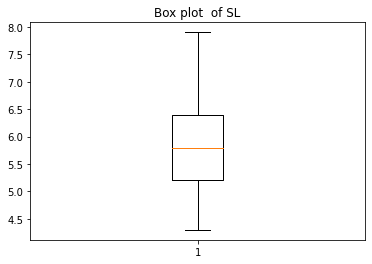

In [9]:
# checking 'SL' column

plt.boxplot(data['SL'])
plt.title('Box plot  of SL' )

- There are no outliers in 'SL'.

Text(0.5, 1.0, 'Box plot  of SW (before handling outliers)')

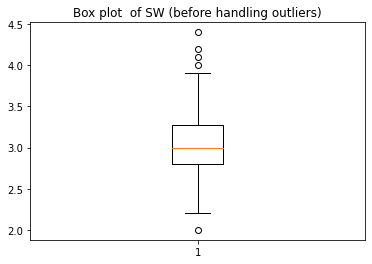

In [10]:
plt.boxplot(data['SW'])# checking 'SW' column
plt.title('Box plot  of SW (before handling outliers)' )

In [11]:
Q1=np.quantile(data['SW'],0.25)
Q3=np.quantile(data['SW'],0.75)
print('Q1,Q3=')
print(Q1,'\n',Q3)
IQR=Q3-Q1
print('IQR=',IQR)

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print('lower_limit=',lower_limit)
print('upper_limit=',upper_limit)

# finding outliers
outlier=[]
for a in data['SW']:
    if (a<lower_limit or a>upper_limit):
        outlier.append(a)
print('\noutlier=',outlier)

Q1,Q3=
2.8 
 3.275
IQR= 0.4750000000000001
lower_limit= 2.0874999999999995
upper_limit= 3.9875

outlier= [4.0, 4.4, 4.1, 4.2, 2.0]


In [12]:
# finding index of outliers 
index_of_outliers=data.loc[data['SW'].gt(upper_limit) | data['SW'].lt(lower_limit)].index
print('index_of_outliers\n')
print(index_of_outliers)

index_of_outliers

Int64Index([14, 15, 32, 33, 60], dtype='int64')


In [13]:
#removing outliers
data.drop([ 14, 15, 32, 33, 60],inplace=True)
#displaying the data
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


Text(0.5, 1.0, 'Box plot  of SW  (after handling outliers)')

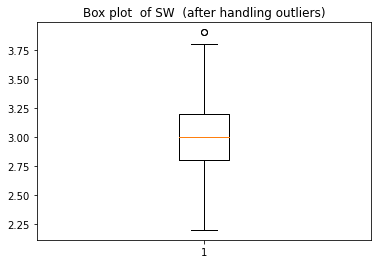

In [14]:
plt.boxplot(data['SW'])# checking 'Age' column
plt.title('Box plot  of SW  (after handling outliers)')

- The values in 'SW' outside the lower and upper limits are removed.

Text(0.5, 1.0, 'Box plot  of PL')

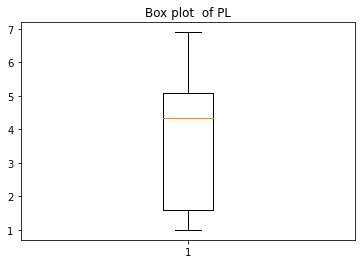

In [15]:
# checking 'PL' column

plt.boxplot(data['PL'])
plt.title('Box plot  of PL' )

- There are no outliers in 'PL'.

Text(0.5, 1.0, 'Box plot  of PW')

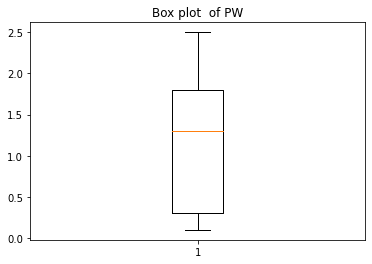

In [16]:
# checking 'PW' column

plt.boxplot(data['PW'])
plt.title('Box plot  of PW' )

- There are no outliers in 'PW'.

##### 3.Encoding

In [17]:
data.Classification.nunique() # checking the number of unique catagorical varibles in 'Classification.'

3

In [18]:
Classification_dummy_encoded=pd.get_dummies(data['Classification'])#dummy encoding for 'Classification' column
Classification_dummy_encoded


,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


##### Correlation Matrix

<AxesSubplot:>

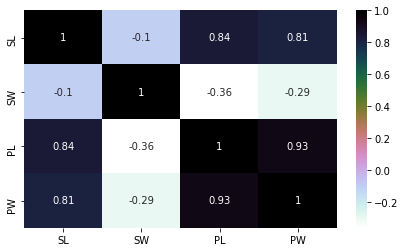

In [19]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix 

- The Sepal Width and Length are not correlated.
-The Petal Width and Length are highly correlated
-We will use all the features for training the algorithm and check the accuracy.

In [20]:
from sklearn import preprocessing

standardisation = preprocessing.StandardScaler()
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = data.drop('Classification', axis =1)
X = standardisation.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3
0,-0.942975,1.277411,-1.434398,-1.359047
1,-1.188673,-0.062854,-1.434398,-1.359047
2,-0.083029,0.473252,-1.493003,-1.359047
3,-1.557221,0.205199,-1.375794,-1.359047
4,-1.065824,1.545463,-1.434398,-1.359047
...,...,...,...,...
140,1.022615,-0.062854,0.792577,1.420200
141,0.531217,-1.403118,0.675368,0.890820
142,0.776916,-0.062854,0.294438,1.023165
143,0.408368,1.009358,0.909786,1.420200


## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


## Logistic Regression

In [21]:
#splitting the data into inputs and output
y = data['Classification']
x = data.drop('Classification', axis =1)


In [22]:
#importing train_test_split from the scikit-learn library
from sklearn.model_selection import train_test_split

# we have to split the data into training and testing parts 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

#importing  Logistic regression from the scikit-learn library 
from sklearn.linear_model import LogisticRegression


# create instance of the model and storing it to variable logit_model
logit_model = LogisticRegression()

# fit this into xtrain and y train to create the model
logit_model.fit(x_train,y_train)

# next predict the values in the x test using this model created
# and storing those values to variable y_pred
y_pred = logit_model.predict(x_test)


#importing mean_squared_error from sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# finding the accuracy
print('The accuracy of Logistic regression is:',accuracy_score(y_test,y_pred))

The accuracy of Logistic regression is: 0.9310344827586207


C:\Users\DELNA.RAPHEL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN

In [23]:
#importing KNN classifier  from the scikit-learn library
from sklearn.neighbors import KNeighborsClassifier # KNN classifier 

KNN_model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)
print('The accuracy of KNN is: ', accuracy_score(y_test,y_pred))

The accuracy of KNN is:  0.9310344827586207


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier algorithm

DT_model = DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
y_pred = DT_model.predict(x_test)
print('The accuracy of Decision Tree is: ', accuracy_score(y_pred, y_test))

The accuracy of Decision Tree is:  0.896551724137931


## SVM

##### 1.  Linear SVM

In [26]:
# linear classifier
from sklearn.svm import SVC

svm_linear =SVC(kernel ='linear')
svm_linear.fit(x_train,y_train)

y_pred = svm_linear.predict(x_test)
print('Accuracy using linear svm is', accuracy_score(y_test,y_pred))

Accuracy using linear svm is 0.896551724137931


##### 2. polynomial svm

In [27]:
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
svm_poly.get_params()

y_pred = svm_poly.predict(x_test)

print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.9655172413793104


##### 3. Radial based kernel

In [28]:
svm_radial = SVC(kernel='rbf')

# rbf = radial basis function, it is sometimes called gaussian kernel

svm_radial.fit(x_train,y_train)
svm_radial.get_params()


y_pred = svm_radial.predict(x_test)


print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.8620689655172413


## Random Forest

In [25]:
#Import Random Forest Model from sklearn
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print('The accuracy of Decision Tree is: ', accuracy_score(y_pred, y_test))

The accuracy of Decision Tree is:  0.9310344827586207


* SVM with Polynomial function is having highest accuracy(96.5 %).
* As the accuracy is high, this model will be very efficient in predicting iris species.